In [ ]:
# Задания

#     Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были 
#     прочитаны правильно. При необходимости – приведите переменные к нужным типам.
    
#     Постройте график по числу поездок по дате и времени.
    
#     Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
    
#     Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа 
#     укажите полученное число аренд за 2015-07-09, округлив значение до целого.
    
#     Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. 
#     Далее – найдите стандартное отклонение.
    
#     Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
    
#     Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. 
#     Найдите причину данной аномалии.
    
#     Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

In [ ]:
#     Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были 
#     прочитаны правильно. При необходимости – приведите переменные к нужным типам.

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [66]:
london = pd.read_csv('london.csv')
london

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [67]:
london.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [68]:
london.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [69]:
london.timestamp = pd.to_datetime(london.timestamp)

In [70]:
london.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [71]:
#     Постройте график по числу поездок по дате и времени.

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

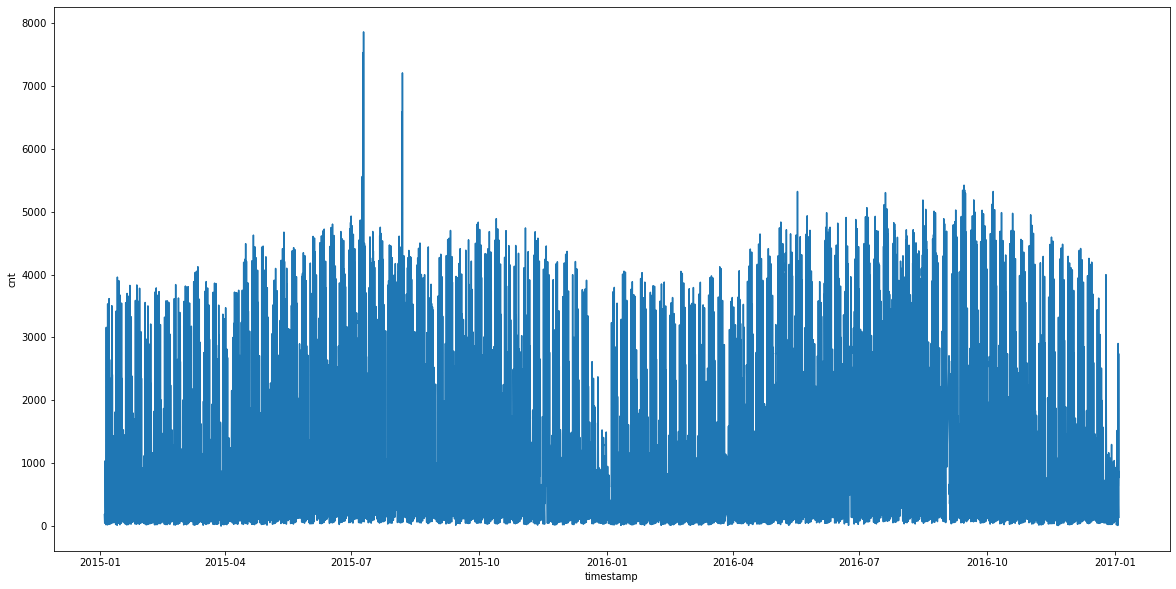

In [72]:
plt.figure(figsize=(20,10))
sns.lineplot(x='timestamp', y='cnt', data=london)

In [73]:
#     Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

In [74]:
london = london.sort_values('timestamp')
london

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [75]:
london_no_index = london.set_index('timestamp')

In [76]:
london_no_index

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [77]:
london_cnt_1 = london_no_index.resample(rule='D').cnt.sum() #способ 1
london_cnt_1

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

In [175]:
london_cnt_2 = london_no_index.resample(rule='D').agg({'cnt':'sum'}) #способ 2, эквивалентный предыдущему
london_cnt_2

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


<AxesSubplot:xlabel='timestamp'>

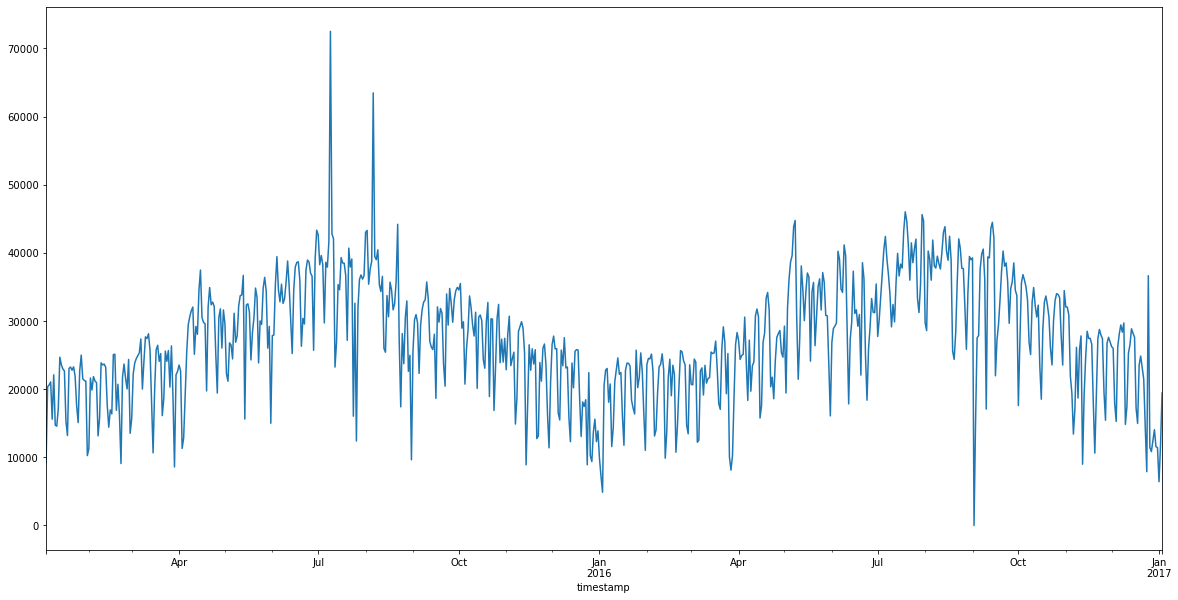

In [176]:
plt.figure(figsize=(20,10))
london_cnt_1.plot()

In [177]:
#     Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа 
#     укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [178]:
london_cnt_2_rol = london_cnt_2.cnt.rolling(3).mean()
london_cnt_2_rol

timestamp
2015-01-04             NaN
2015-01-05             NaN
2015-01-06    16739.666667
2015-01-07    20683.000000
2015-01-08    19092.666667
                  ...     
2016-12-30    12682.000000
2016-12-31    12347.333333
2017-01-01     9803.666667
2017-01-02     9889.333333
2017-01-03    12560.000000
Freq: D, Name: cnt, Length: 731, dtype: float64

In [179]:
round(london_cnt_2_rol.loc['2015-07-09'], 0)

50705.0

In [180]:
#     Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. 
#     Далее – найдите стандартное отклонение.

In [181]:
london_cnt_2['rol'] = london_cnt_2.cnt.rolling(3).mean()

In [182]:
london_cnt_2['cnt_rol'] = london_cnt_2.cnt - london_cnt_2.rol

In [183]:
london_cnt_2

,cnt,rol,cnt_rol
timestamp,,,
2015-01-04,9234,NaN,NaN
2015-01-05,20372,NaN,NaN
2015-01-06,20613,16739.666667,3873.333333
2015-01-07,21064,20683.000000,381.000000
2015-01-08,15601,19092.666667,-3491.666667
...,...,...,...
2016-12-30,11566,12682.000000,-1116.000000
2016-12-31,11424,12347.333333,-923.333333
2017-01-01,6421,9803.666667,-3382.666667


In [184]:
round(np.std(london_cnt_2.cnt_rol), 2)

4558.59

In [185]:
std = np.std(london_cnt_2.cnt_rol)
std

4558.586641117938

In [186]:
#     Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

In [187]:
london_cnt_2['upper_bound'] = london_cnt_2.rol + 2.576 * std

In [188]:
london_cnt_2['lower_bound'] = london_cnt_2.rol - 2.576 * std

In [189]:
london_cnt_2

,cnt,rol,cnt_rol,upper_bound,lower_bound
timestamp,,,,,
2015-01-04,9234,NaN,NaN,NaN,NaN
2015-01-05,20372,NaN,NaN,NaN,NaN
2015-01-06,20613,16739.666667,3873.333333,28482.585854,4996.747479
2015-01-07,21064,20683.000000,381.000000,32425.919188,8940.080812
2015-01-08,15601,19092.666667,-3491.666667,30835.585854,7349.747479
...,...,...,...,...,...
2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521


In [190]:
london_cnt_2.loc['2017-01-03']

cnt            19436.000000
rol            12560.000000
cnt_rol         6876.000000
upper_bound    24302.919188
lower_bound      817.080812
Name: 2017-01-03 00:00:00, dtype: float64

In [191]:
round(london_cnt_2.loc['2017-01-03'][3], 2)

24302.92

In [192]:
#     Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. 
#     Найдите причину данной аномалии.

In [196]:
london_cnt_2.query('cnt > upper_bound').sort_values('cnt', ascending=False)

,cnt,rol,cnt_rol,upper_bound,lower_bound
timestamp,,,,,
2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812
2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479
2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812


In [ ]:
'2015-07-09' в Лондоне забастовки

In [ ]:
#     Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

In [199]:
london_cnt_2.query('cnt < lower_bound').sort_values('cnt')

,cnt,rol,cnt_rol,upper_bound,lower_bound
timestamp,,,,,
2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146
2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146
2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812
2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146
2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479
2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812
2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146
2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146
2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479


In [ ]:
'2016-09-02' ошибка при сборе данных